In [1]:
# Let's import the libraries we will need
import pandas as pd
import numpy as np
import json as json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
%matplotlib inline

#import dask.array as da
#import dask.dataframe as dd
#import dask.bag as db
#from dask.distributed import Client

#client = Client()
#client

In [2]:
df = pd.read_csv('./archive/USvideos.csv')
categories = json.load(open('./archive/US_category_id.json', 'r'))

# Drop unused columns
df = df.drop(['thumbnail_link', 'video_id'], axis=1)

# Enrich data
df['publish_hour'] = pd.to_datetime(df['publish_time']).dt.hour
df['comments_disabled'] = df['comments_disabled'].apply(lambda row: 0 if row == False else 1)
df['ratings_disabled'] = df['ratings_disabled'].apply(lambda row: 0 if row == False else 1)
df['video_error_or_removed'] = df['video_error_or_removed'].apply(lambda row: 0 if row == False else 1)
df['like_dislike'] = df[['likes', 'dislikes']].apply(lambda row: row['likes'] / np.sum([row['likes'], row['dislikes']]), axis=1)
df['tags'] = df['tags'].apply(lambda row: ' '.join( i.strip('""') for i in row.split('|') ))
df['anti_participation'] = df[['comments_disabled', 'ratings_disabled']].apply(lambda row: row.sum(), axis=1)

df.head()

<ipython-input-2-5d3d958fc8cb>:12: RuntimeWarning: invalid value encountered in long_scalars
  df['like_dislike'] = df[['likes', 'dislikes']].apply(lambda row: row['likes'] / np.sum([row['likes'], row['dislikes']]), axis=1)


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_hour,like_dislike,anti_participation
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,0,0,0,SHANTELL'S CHANNEL - https://www.youtube.com/s...,17,0.950970,0
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,last week tonight trump presidency last week t...,2418783,97185,6146,12703,0,0,0,"One year after the presidential election, John...",7,0.940521,0
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,racist superman rudy mancuso king bach racist ...,3191434,146033,5339,8181,0,0,0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,19,0.964729,0
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,rhett and link gmm good mythical morning rhett...,343168,10172,666,2146,0,0,0,Today we find out if Link is a Nickelback amat...,11,0.938550,0
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,ryan higa higatv nigahiga i dare you idy rhpc ...,2095731,132235,1989,17518,0,0,0,I know it's been a while since we did this sho...,18,0.985181,0


In [3]:
category_name_mapping = {}
category_id_mapping = {}

for item in categories['items']:
    category_name_mapping[int(item['id'])] = item['snippet']['title']
df['category_name'] = df['category_id'].apply(lambda row: category_name_mapping[int(row)])
    
for index, _id in enumerate(df['category_id'].unique()):
    category_id_mapping[_id] = index
df['category_id'] = df['category_id'].apply(lambda row: category_id_mapping[int(row)])

df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_hour,like_dislike,anti_participation,category_name
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,0,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,0,0,0,SHANTELL'S CHANNEL - https://www.youtube.com/s...,17,0.950970,0,People & Blogs
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,1,2017-11-13T07:30:00.000Z,last week tonight trump presidency last week t...,2418783,97185,6146,12703,0,0,0,"One year after the presidential election, John...",7,0.940521,0,Entertainment
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2,2017-11-12T19:05:24.000Z,racist superman rudy mancuso king bach racist ...,3191434,146033,5339,8181,0,0,0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,19,0.964729,0,Comedy
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,1,2017-11-13T11:00:04.000Z,rhett and link gmm good mythical morning rhett...,343168,10172,666,2146,0,0,0,Today we find out if Link is a Nickelback amat...,11,0.938550,0,Entertainment
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,1,2017-11-12T18:01:41.000Z,ryan higa higatv nigahiga i dare you idy rhpc ...,2095731,132235,1989,17518,0,0,0,I know it's been a while since we did this sho...,18,0.985181,0,Entertainment


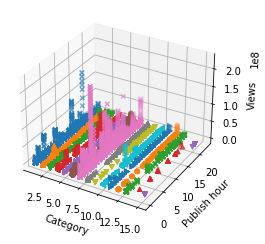

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

markers = {
    10: 'o', # Music
    20: 'x', # Gaming
    22: '^', # vlogging
}
markers = ['o', 'x', '^', 'v', '<', '>']
for cat in range(1, 33):
    _df = df[df['category_id'] == cat]
    ax.scatter( _df['category_id'], _df['publish_hour'], _df['views'], marker=markers[cat % len(markers)])

ax.set_xlabel('Category')
ax.set_ylabel('Publish hour')
ax.set_zlabel('Views')

plt.show()

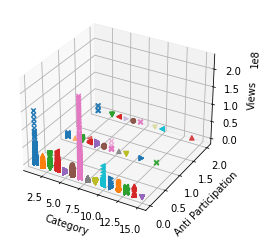

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

markers = {
    10: 'o', # Music
    20: 'x', # Gaming
    22: '^', # vlogging
}
markers = ['o', 'x', '^', 'v', '<', '>']
for cat in range(1, 33):
    _df = df[df['category_id'] == cat]
    ax.scatter( _df['category_id'], _df['comments_disabled'] + _df['ratings_disabled'] + _df['video_error_or_removed'], _df['views'], marker=markers[cat % len(markers)])

ax.set_xlabel('Category')
ax.set_ylabel('Anti Participation')
ax.set_zlabel('Views')

plt.show()

In [6]:
from sklearn.model_selection import train_test_split


xdf = df[['title', 'tags', 'publish_time', 'anti_participation', 'video_error_or_removed']]
ydf = df[['category_id']]

Xtr, Xts, ytr, yts = train_test_split(xdf, ydf, shuffle=True, test_size=0.33)

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Concatenate
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


[nltk_data] Downloading package stopwords to /home/jc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def convert_to_sequences(x):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(x)
    _sequences = tokenizer.texts_to_sequences(x)
    maxlen = max(len(_seq) for _seq in _sequences)
    vocab_size = len(tokenizer.word_index) + 1
    _xtr = pad_sequences(_sequences, maxlen, padding='post')
    
    return _xtr, maxlen, vocab_size

def create_input_channel(maxlen, vocab_size):
    input_ = Input(shape=(maxlen,))
    embedding = Embedding(vocab_size, 100)(input_)
    conv = Conv1D(filters=32, kernel_size=4, activation='softmax')(embedding)
    drop = Dropout(0.5)(conv)
    pool = MaxPooling1D(pool_size=2)(drop)
    flat = Flatten()(pool)
    
    return input_, flat

Xtr1, maxlen1, vocab_size1 = convert_to_sequences(Xtr['title'].to_numpy())
Xtr2, maxlen2, vocab_size2 = convert_to_sequences(Xtr['tags'].to_numpy())

input11, flat11 = create_input_channel(maxlen1, vocab_size1)
input12, flat12 = create_input_channel(maxlen1, vocab_size1)
input13, flat13 = create_input_channel(maxlen1, vocab_size1)

input21, flat21 = create_input_channel(maxlen2, vocab_size2)
input22, flat22 = create_input_channel(maxlen2, vocab_size2)
input23, flat23 = create_input_channel(maxlen2, vocab_size2)

merged = Concatenate()([
    flat11, flat12, flat13, 
    flat21, flat22, flat23,
])

dense = Dense(10, activation='softmax')(merged)
outputs = Dense(1, activation='softmax')(dense)
model = Model(inputs=[input11, input12, input13, input21, input22, input23], outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.fit([Xtr1,Xtr1,Xtr1, Xtr2,Xtr2,Xtr2], ytr.to_numpy(), epochs=10, batch_size=16)

Epoch 1/10
1029/1715 [=================>............] - ETA: 29s - loss: -55.2430 - accuracy: 0.2430

KeyboardInterrupt: 